## Критерий согласия Пирсона

Также называется критерием **согласия $\chi^{2}$**.

Это **непараметрический** метод, позволяющий оценить значимость различий между фактическим (выявленным в результате исследования) количеством исходов или качественных характеристик выборки, попадающих в каждую категорию, и теоретическим количеством, которое можно ожидать в изучаемых группах при справедливости нулевой гипотезы.

Наиболее употребляемый критерий для проверки гипотезы о принадлежности наблюдаемой выборки $x_1, x_2, \ldots, x_n$ объемом $n$ некоторому теоретическому закону распределения $Z$.

$$
\begin{equation*}
\begin{cases}
H_{0}: X \sim Z\\
H_{1}: X \nsim Z
\end{cases}
\end{equation*}
$$

К примеру, у нас есть выборка размера $n = 1000$. И мы предполагаем, что данная выборка принадлежит рапределению $N(-2, 5)$.

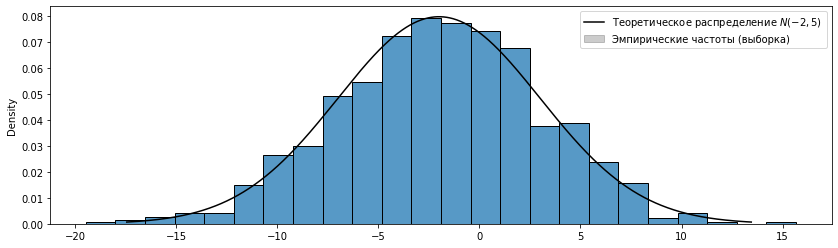

In [25]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


n = 1000
loc, scale = -2, 5

# генерируем псевдослучайную выборку для проведения эксперимента
sample = stats.norm.rvs(loc=-2, scale=5, size=n)

# функция плотности теоретического распределения, принадлежность нашей выборки к которому мы хотим проверить
x = np.linspace(
    stats.norm.ppf(0.001, loc=loc, scale=scale),
    stats.norm.ppf(0.999, loc=loc, scale=scale), 1000
)
y = stats.norm.pdf(x, loc=loc, scale=scale)

fig, ax = plt.subplots(figsize=(14, 4))
sns.histplot(sample, stat="density", bins=24, ax=ax)
sns.lineplot(x=x, y=y, ax=ax, c="black")
ax.legend([
    "Теоретическое распределение $N(-2, 5)$", 
    "Эмпирические частоты (выборка)"], loc=1)
fig.show()

Как мы видим, между **эмпирическими частотами** и **теоретическим распределением** существует разница. И возникает вопрос, **объясняются ли эти расхождения только случайными обстоятельствами, или же они являются следствием того, теоретическое распределение плохо описывает природу наших данных?**

Карл Пирсон разработал математический инструмент проверки нулевой гипотезы $H_0$, что **теоретическая кривая корректно описывает экспериментальные данные гистограммы.**

In [71]:
?np.unique

In [72]:
# разобьем выборку на интервалы и посчитаем количество значений выборки, попадающих в каждый интервал
splitted = pd.cut(sample, bins=24, right=False)
intervals, int_count = np.unique(splitted, return_counts=True)

splitted

[[-3.369, -1.905), [-3.369, -1.905), [1.023, 2.487), [-6.298, -4.834), [2.487, 3.951), ..., [-9.226, -7.762), [2.487, 3.951), [-7.762, -6.298), [-9.226, -7.762), [2.487, 3.951)]
Length: 1000
Categories (24, interval[float64]): [[-19.475, -18.011) < [-18.011, -16.547) < [-16.547, -15.083) < [-15.083, -13.618) ... [9.808, 11.272) < [11.272, 12.736) < [12.736, 14.2) < [14.2, 15.699)]

In [75]:
intervals

array([Interval(-19.475, -18.011, closed='left'),
       Interval(-18.011, -16.547, closed='left'),
       Interval(-16.547, -15.083, closed='left'),
       Interval(-15.083, -13.618, closed='left'),
       Interval(-13.618, -12.154, closed='left'),
       Interval(-12.154, -10.69, closed='left'),
       Interval(-10.69, -9.226, closed='left'),
       Interval(-9.226, -7.762, closed='left'),
       Interval(-7.762, -6.298, closed='left'),
       Interval(-6.298, -4.834, closed='left'),
       Interval(-4.834, -3.369, closed='left'),
       Interval(-3.369, -1.905, closed='left'),
       Interval(-1.905, -0.441, closed='left'),
       Interval(-0.441, 1.023, closed='left'),
       Interval(1.023, 2.487, closed='left'),
       Interval(2.487, 3.951, closed='left'),
       Interval(3.951, 5.415, closed='left'),
       Interval(5.415, 6.879, closed='left'),
       Interval(6.879, 8.344, closed='left'),
       Interval(8.344, 9.808, closed='left'),
       Interval(9.808, 11.272, closed='lef

## A/B тесты

Выполнено на базе [статьи](https://towardsdatascience.com/simple-and-complet-guide-to-a-b-testing-c34154d0ce5a) на medium.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Определение

Взято из википедии:

**А/В тестирование** - метод маркетингового исследования, суть которого заключается в том, что контрольная группа элементов сравнивается с набором тестовых групп, в которых один или несколько показателей были изменены для того, чтобы выяснить, какие изменения улучшают целевой показатель. Таким образом в ходе теста сравниваются вариант А и вариант В и целью которого является определение лучшего из двух протестированных вариантов.

В ходе А/В теста формируются две подвыборки из "популяции" - контрольная (control) и проверяемая (variant), и определяется, статистически ли значима разница между этими двумя подвыборками.

Существуют и другие варианты экспериментов, такие как ABC тестирование, мультивариативное тестирование.

### Выбор целевого показателя для теста

Один из самых важных этапов - выбор целевого показателя (метрики), на основании которого будет проводиться тестирование - выявление **статистически значимой разницы** между группами А и В.

Метрики можно разделить по типам:

1. Конверсия - доля пользователей от общего числа, совершивших какое-либо действие. Действием может быть заполнение формы, совершение покупки, регистрация, подписка на новости, клик на ссылку или блок (CTR - Click-Throught rate).
2. Экономические  метрики - величина среднего чека, объем выручки на число пользоватлей и т.д. (как правило применимо для интернет магазинов).
3. Поведенческие факторы - метрики, показывающие заинтересованность пользователей в ресурсе. Глубина просмотра страниц - число просмотренных страниц, отнесенное к числу посетителей на сайте, средняя продолжительность сессии, показатель отказов - для пользователей, покинувших сайи сразу после первого захода, коэффициент удержания.

Основные метрики конверсии:

- Click-Through Rate (CTR) или **кликабельность**, **показатель кливабельности**

$$
\text{CTR} = \frac{\text{количество кликов}}{\text{количество показов}} \cdot 100 \%
$$

где **количество показов** - общее количество показов, к примеру, баннера, пользователям, или количество сессий на сайте.

- Click-Through Probability (CTP) или **кликабельность**, **показатель кликабельности**

$$
\text{CTP} = \frac{\text{количество пользователей, совершивших хотя бы один клик}}{\text{количество уникальных посетителей для каждой сраницы}} \cdot 100 \%
$$

в отличии от CTR, данная метрика не учитывает клики, совершенные одним пользователем в рамках одной сессии по одному элементу (например по одной кнопке по причине нетерпеливости пользователя)

- Conversion rate - один из значимых показателей в интернет-маркетинге. Конверсией называют количственное соотношение пользователей сайта, которые совершили целевое действие, к общему числу пользователей. Целевое действие, например, покупка игры на игровом портале. Также обобщает метрики CTR и CTP (это частные случаи конверсии).

$$
\text{CR} = \frac{\text{converted}}{\text{converted + not converted}} \cdot 100 \%
$$

К примеру, необходимо посчитать CR сайта продажи видеоигры. Для этого:
- Выбираем определенный период, за который мы хотим посчитать CR - это может быть день, неделя, месяц, квартал или год.
- Разделить количество покупок видеоигры на количество посетителей сайта и умножить на 100%.

За июнь 2021 года на сайт зашло 4936 человек, 300 человек из которых купило видеоигру.

$$
\text{CR} = \frac{300}{4936} \cdot 100\% = ~6\%
$$

### Описание тестируемой гипотезы

А/В тестирование всегда основано на гипотезе, которую необходимо проверить. Например:

$$
\begin{equation*}
\begin{cases}
H_{0}: \mu_{con} = \mu_{exp} \\
H_{1}: \mu_{con} \neq \mu_{exp}
\end{cases}
\end{equation*}
$$

- Гипотеза $H_{0}$ (нулевая гипотеза) - новый дизайн сайта не влияет на конверсию (например на покупательность игры), т.е. никакого эффекта новое изменение не имеет. Если в ходе теста отвергнуть нулевую гипотезу не получилось, то мы ее принимаем и нет никакого смысла внедрять новый дизайн сайта.

- Гипотеза $H_{1}$ (альтернативная гипотеза) - новый дизайн сайта влияет на конверсию. Если в ходе тестирования мы отвергаем нулевую гипотезу, то в таком случае мы принимаем альтернативную и внедряем новый дизайн сайта.

- Ошибка первого рода - отвергаем нулевую гипотезу, когда на самом деле она верна. В нашем случае это означает, что мы внедрили изменения в дизайн нашего сайта, а в итоге он не оказал влияние на конверсию.

- Ошибка второго рода - решили не внедрять новый дизайн, хотя на самом деле он имел бы влияние на конверсию.

### Как биномиальное и нормальное распределения вовлечены в A/B тестирование?